### Distribution of number of blaze rod drops

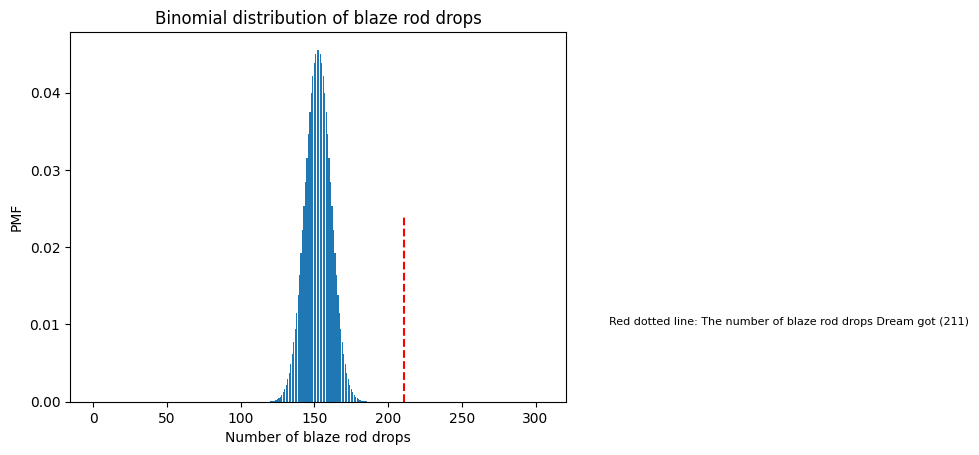

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# Set the parameters for the binomial distribution 
n = 305  # Number of trials
p = 0.5  # Probability of success
dreams_result = 211

# x values
x_values = list(range(0, n+1))
y_values = [binom.pmf(x, n, p) for x in x_values]

# plot the graph
plt.bar(x_values, y_values)
plt.title("Binomial distribution of blaze rod drops")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")
plt.text(350, 0.01, "Red dotted line: The number of blaze rod drops Dream got (211)", fontsize=8, color='black')
plt.show()

#### plot for pmf >= some threshold

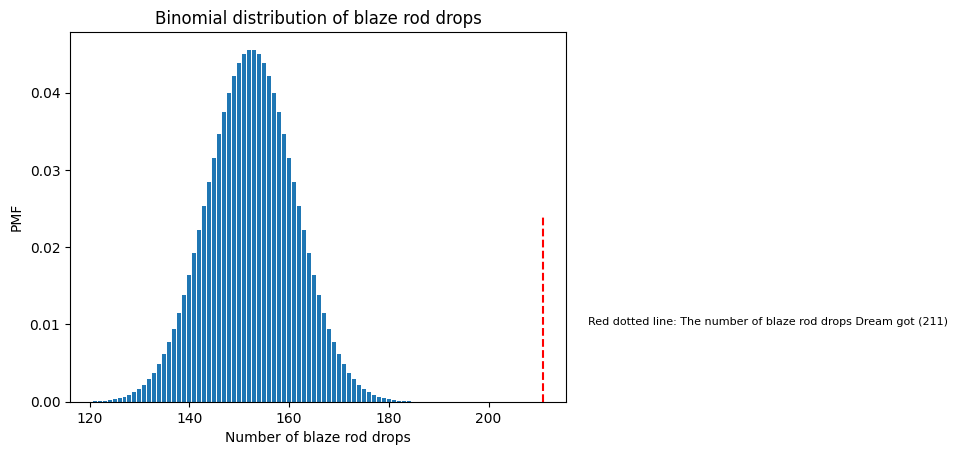

In [2]:
#import matplotlib.pyplot as plt
#from scipy.stats import binom

# Set the parameters for the binomial distribution
# n = 305  # Number of trials
# p = 0.5  # Probability of success
# dreams_result = 211
threshold = 0.00005

# x values and y values
x_values = list(range(0, n+1))
y_values = [binom.pmf(x, n, p) for x in x_values]

# filter
new_x_values = [x for x in x_values if y_values[x] >= threshold]
new_y_values = [y for y in y_values if y>= threshold]

# plot the graph
plt.bar(new_x_values, new_y_values)
plt.title("Binomial distribution of blaze rod drops")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")
plt.text(220, 0.01, "Red dotted line: The number of blaze rod drops Dream got (211)", fontsize=8, color='black')
plt.show()

#### Code simulation for distribution of blaze rods

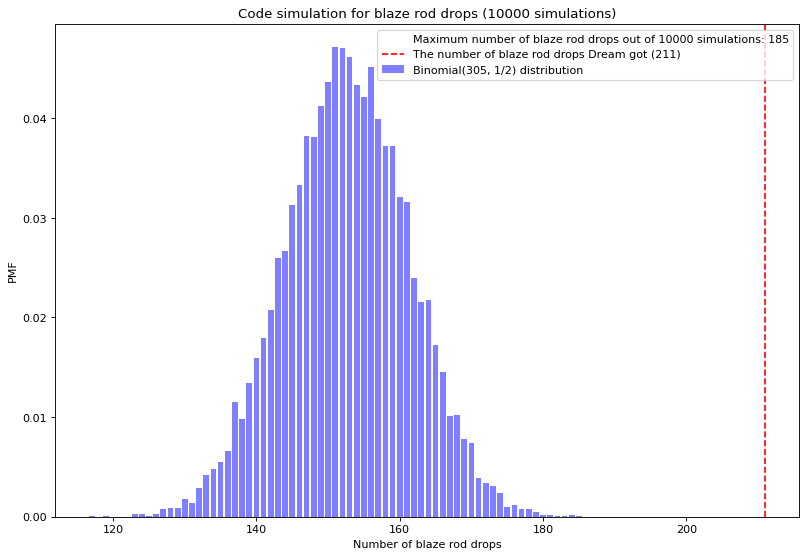

In [33]:
import random
from collections import Counter

# set the parameters
number_of_simulation = 10000
data = [] # storing no. of success of each trial, elements could repeat
n = 305
p = 0.5

# simulate data
for i in range(number_of_simulation):
    success_num = 0
    for j in range(n):
        if random.random() < p:
            success_num += 1
    data.append(success_num)

# clean up the data
dict = Counter(data)
x_values = list(dict.keys())
y_values = list(y/number_of_simulation for y in dict.values()) # turn frequency into relative frequency

max_x = max(x_values)

# plot the graph
fig = plt.figure(figsize=(12, 8), dpi=80)

#plt.bar(x_values, y_values)
plt.bar(x_values, y_values, color='blue', alpha=0.5, label='Binomial(305, 1/2) distribution')
plt.plot([], [], ' ', label=f"Maximum number of blaze rod drops out of {number_of_simulation} simulations: {max_x}")

plt.title(f"Code simulation for blaze rod drops ({number_of_simulation} simulations)")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 1, label="The number of blaze rod drops Dream got (211)")

plt.legend()

plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")
#plt.text(220, 0.01, "Red dotted line: The number of blaze rod drops Dream got (211)", fontsize=8, color='black')
#plt.text(220, 0.005, f"Maximum number of blaze rod drops out of {number_of_simulation} simulations: {max_x}", fontsize=8, color='black')
plt.show()

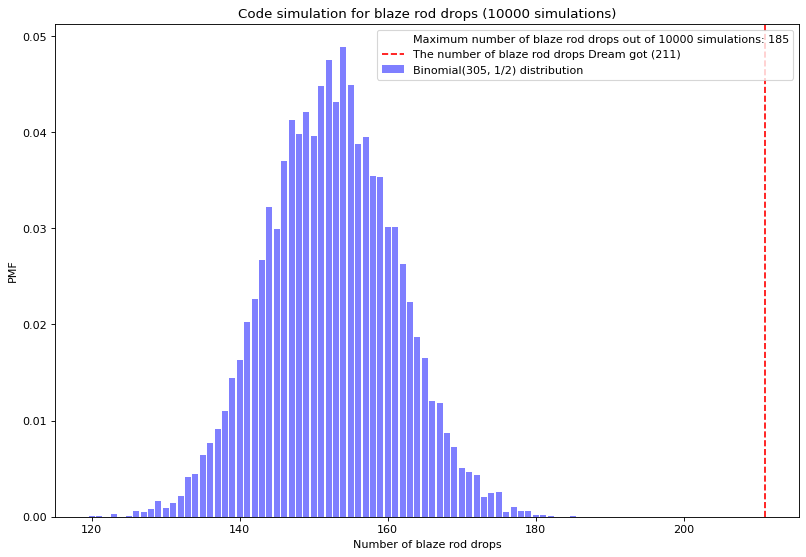

In [30]:
import random
from collections import Counter

# set the parameters
number_of_simulation = 10000
data = [] # storing no. of success of each trial, elements could repeat
n = 305
p = 0.5

# simulate data
for i in range(number_of_simulation):
    success_num = 0
    for j in range(n):
        if random.random() < p:
            success_num += 1
    data.append(success_num)

# clean up the data
dict = Counter(data)
x_values = list(dict.keys())
y_values = list(y/number_of_simulation for y in dict.values()) # turn frequency into relative frequency

max_x = max(x_values)

# plot the graph
fig = plt.figure(figsize=(12, 8), dpi=80)

#plt.bar(x_values, y_values)
plt.bar(x_values, y_values, color='blue', alpha=0.5, label='Binomial(305, 1/2) distribution')
plt.plot([], [], ' ', label=f"Maximum number of blaze rod drops out of {number_of_simulation} simulations: {max_x}")

plt.title(f"Code simulation for blaze rod drops ({number_of_simulation} simulations)")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 1, label="The number of blaze rod drops Dream got (211)")

plt.legend()

plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")
#plt.text(220, 0.01, "Red dotted line: The number of blaze rod drops Dream got (211)", fontsize=8, color='black')
#plt.text(220, 0.005, f"Maximum number of blaze rod drops out of {number_of_simulation} simulations: {max_x}", fontsize=8, color='black')
plt.show()

#### Code simulation for distribution of blaze rods with deduced modified probability

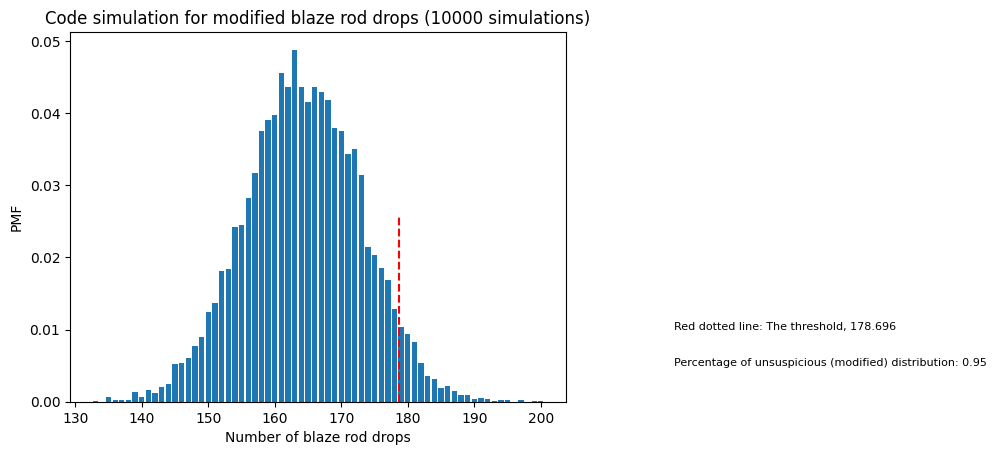

In [4]:
import random
from collections import Counter
import math

# set the parameters
number_of_simulation = 10000
data = [] # storing no. of success of each trial, elements could repeat, every trial has n = 305
n = 305
p = 0.5
m = 1.077881528 # modify constant
t = n*p + 3*math.sqrt(n*p*(1-p)) #threshold

# simulate data
for i in range(number_of_simulation):
    success_num = 0
    for j in range(n):
        if random.random() < p*m:
            success_num += 1
    data.append(success_num)

# clean up the data
dict = Counter(data)
x_values = list(dict.keys())
y_values = list(y/number_of_simulation for y in dict.values()) # turn frequency into relative frequency

max_x = max(x_values)

# plot the threshold and % of distribution less than the threshold
sum = 0
for x,y in dict.items():
    if x <= t:
        sum += y
unsuspicious_percentage = sum/number_of_simulation
plt.axvline(t, color='r', linestyle='--', ymax = 0.5)
plt.text(220, 0.01, f"Red dotted line: The threshold, {t:.3f}", fontsize=8, color='black')
plt.text(220, 0.005, f"Percentage of unsuspicious (modified) distribution: {unsuspicious_percentage}", fontsize=8, color='black')
#plt.text(220, 0.005, f"Maximum number of blaze rod drops out of {number_of_simulation} simulations: {max_x}", fontsize=8, color='black')

# plot the graph
plt.bar(x_values, y_values)
plt.title(f"Code simulation for modified blaze rod drops ({number_of_simulation} simulations)")
plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")

plt.show()

In [5]:
#### calculations

In [6]:
n = 305
p = 0.5
t = n*p + 3*math.sqrt(n*p*(1-p))
print(t)
k = 1.644853627**2

import numpy as np
coef = []
coef.append(152.5**2 + k*76.25)
coef.append(-2*t*152.5-k*152.5)
coef.append(t**2)

print(coef)
print(np.roots(coef))


a = coef[0]
b = coef[1]
c = coef[2]

# calculate the discriminant
import cmath
d = (b**2) - (4*a*c)

sol1 = (-b-cmath.sqrt(d))/(2*a)
sol2 = (-b+cmath.sqrt(d))/(2*a)
print(sol1, sol2)



178.69637379485948
[23462.54768838695, -54914.98938420604, 31932.394007432144]
[1.26265668 1.07788153]
(1.0778815282379226+0j) (1.262656682426507+0j)
